## Titanic 

Kaggle Titanic Completition
https://www.kaggle.com/competitions/titanic

Kernel
https://youtube.com/playlist?list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF&si=5q0oi2TAwQPGTxJx



## 1. Import library and read datasets

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('dark_background')
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py

sns.set(font_scale=1.0)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [114]:
df_train = pd.read_csv('~/aiffel/data/titanic_train.csv')

In [115]:
df_test = pd.read_csv('~/aiffel/data/titanic_test.csv')

In [116]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [117]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [118]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [120]:
df_train.shape

(891, 12)

In [121]:
df_test.shape

(418, 11)

In [122]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Understand null value

In [123]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [124]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [125]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

In [126]:
False + True

1

In [127]:
True + True

2

<Axes: >

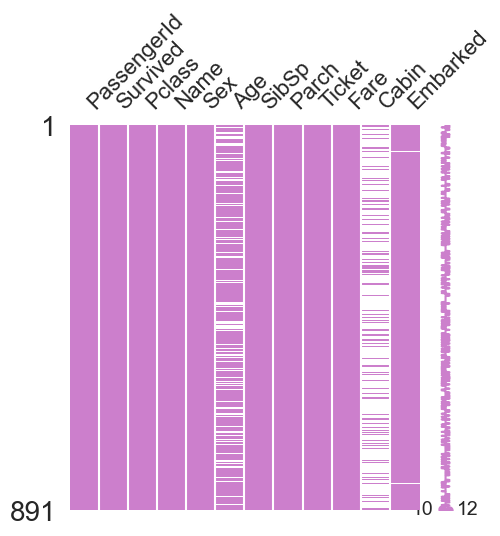

In [128]:
msno.matrix(df = df_train.iloc[:, :], figsize=(5, 5), color=(0.8, 0.5, 0.8))

<Axes: >

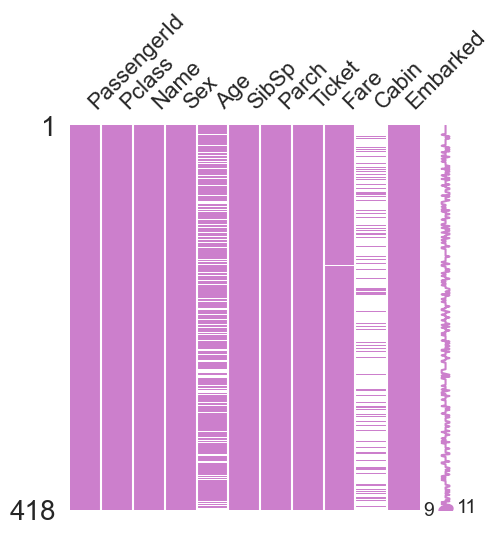

In [129]:
msno.matrix(df = df_test.iloc[:, :], figsize=(5, 5), color=(0.8, 0.5, 0.8))

<Axes: >

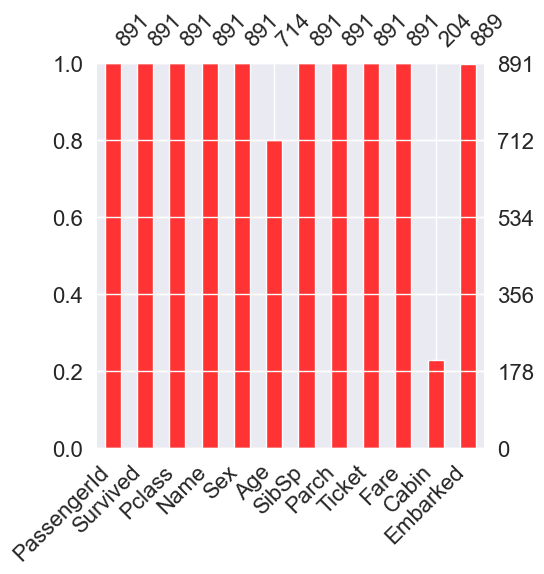

In [130]:
msno.bar(df=df_train.iloc[:, :], figsize=(5, 5), color=(1, 0.2, 0.2))

In [131]:
df_train.iloc[:1, 1]

0    0
Name: Survived, dtype: int64

In [132]:
df_train.iloc[1, :]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

## 3. Confirming target value imblance

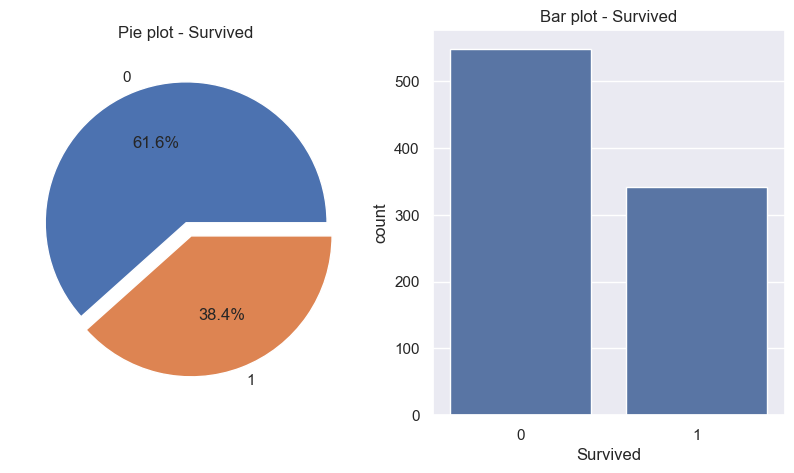

In [133]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.10], autopct = '%1.1f%%', ax = ax[0], shadow = False)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Bar plot - Survived')

plt.show()

In [134]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

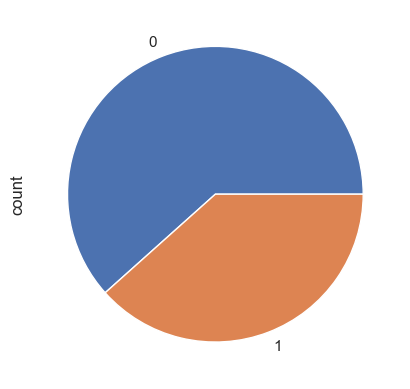

In [135]:
df_train['Survived'].value_counts().plot.pie()

In [136]:
df_train.shape

(891, 12)

## 4. Pclass data analysis

In [137]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [138]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [139]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [140]:
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [141]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [142]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: >

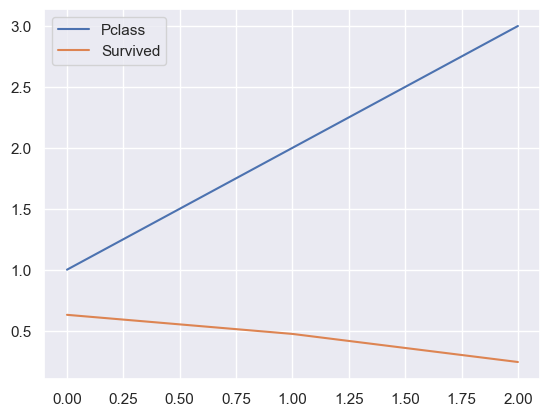

In [143]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot()

<Axes: xlabel='Pclass'>

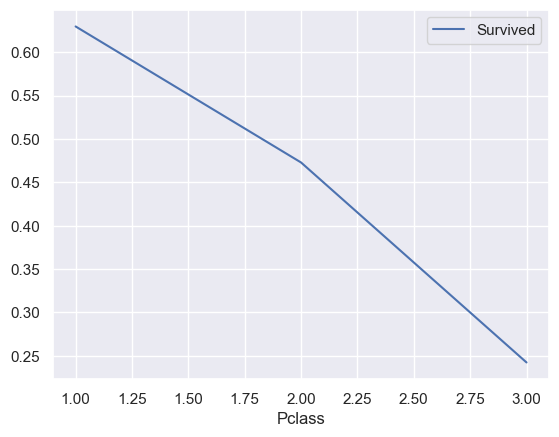

In [144]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot()

<Axes: xlabel='Pclass'>

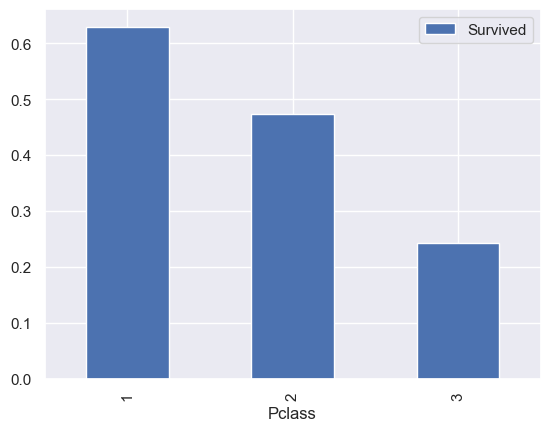

In [145]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

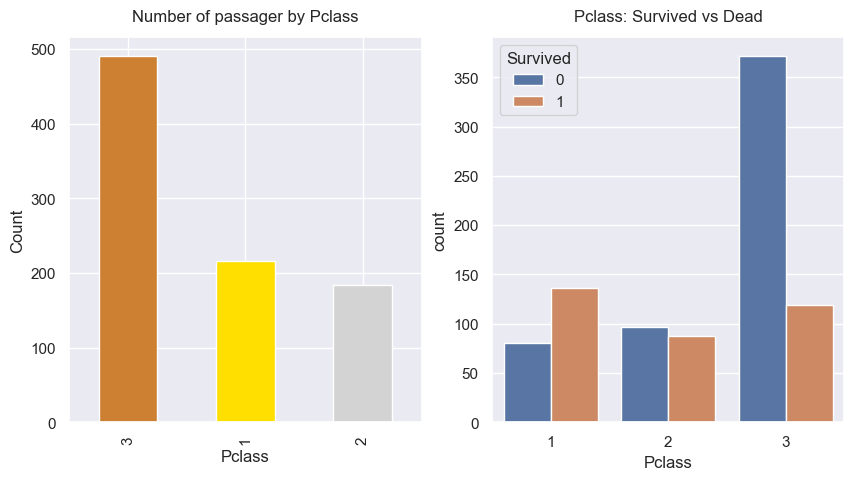

In [146]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (10, 5))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of passager by Pclass', y = y_position)
ax[0].set_ylabel('Count')

sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)

plt.show()

## 5. Gender data analysis

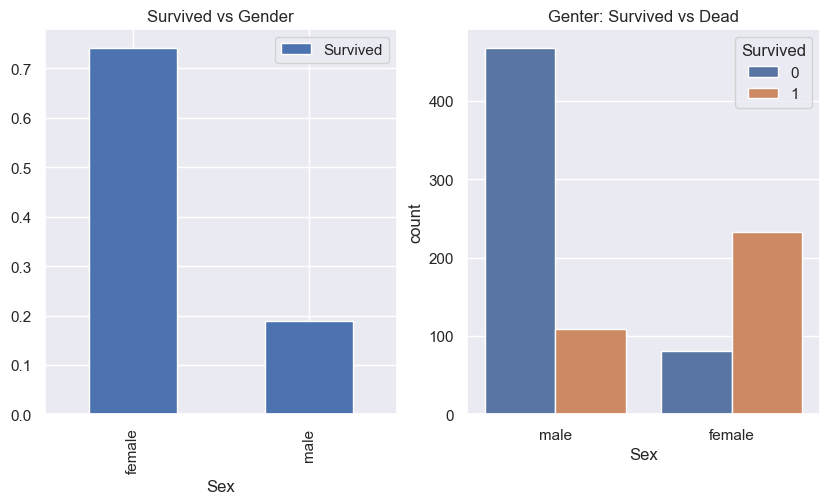

In [149]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Gender')

sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Genter: Survived vs Dead')

plt.show()
                                                                    

<Axes: xlabel='Sex'>

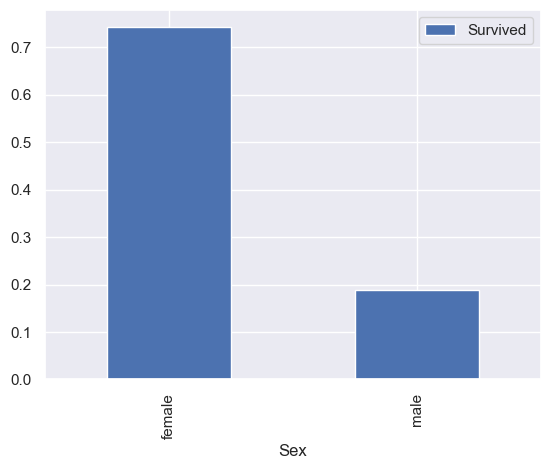

In [155]:
df_train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar()

In [156]:
df_train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [160]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 6. Pclass & Gender data analysis

Text(0.5, 1.0, 'Point Plot - Pclass vs Survived by Gender')

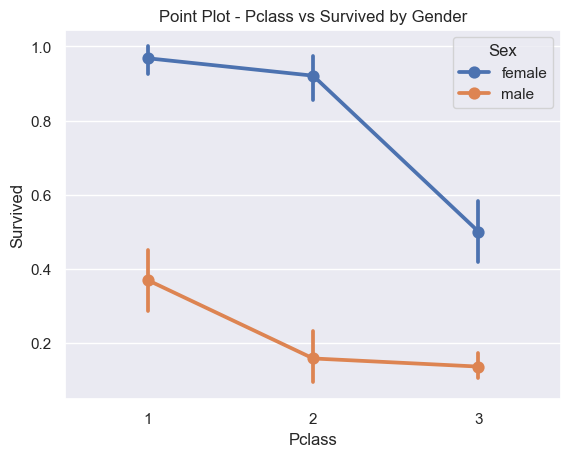

In [182]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
plt.title('Point Plot - Pclass vs Survived by Gender')

Text(0.5, 1.0, 'Line Plot - Pclass vs Survived by Gender')

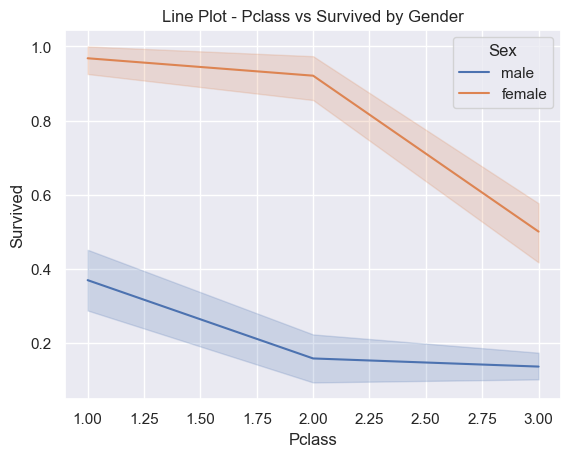

In [183]:
sns.lineplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train)
plt.title('Line Plot - Pclass vs Survived by Gender')

<Axes: xlabel='Sex', ylabel='Survived'>

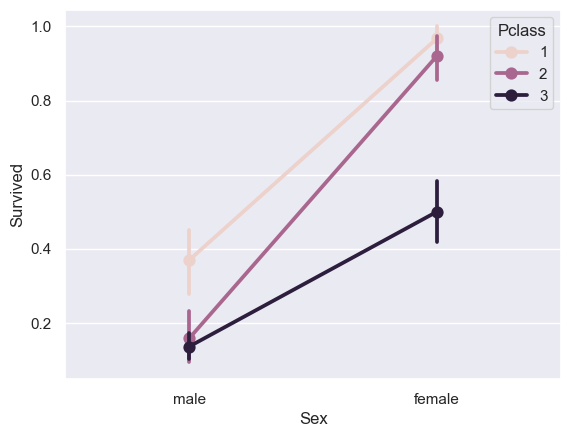

In [189]:
sns.pointplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df_train)

## 7. Age data analysis

In [193]:
print('The oldest passanger: {:.1f} years'.format(df_train['Age'].max()))
print('The youngest passanger: {:.1f} years'.format(df_train['Age'].min()))
print('The average age of passanger: {:.1f} years'.format(df_train['Age'].mean()))

The oldest passanger: 80.0 years
The youngest passanger: 0.4 years
The average age of passanger: 29.7 years


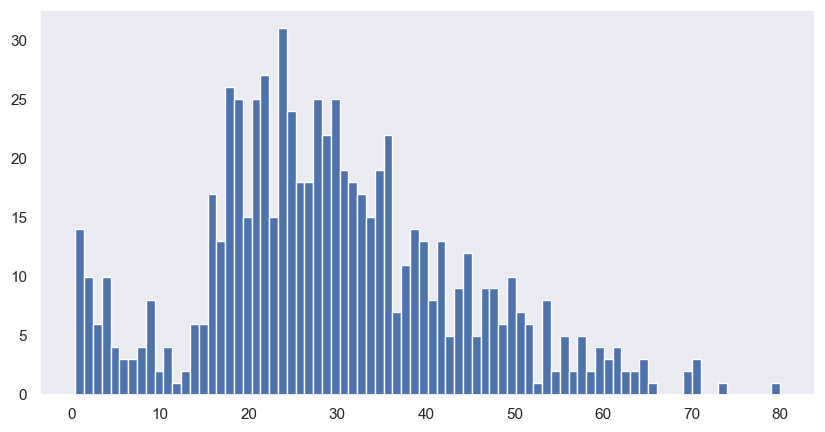

In [224]:
foo = df_train['Age'].hist(bins=80, grid=False, figsize=(10, 5))

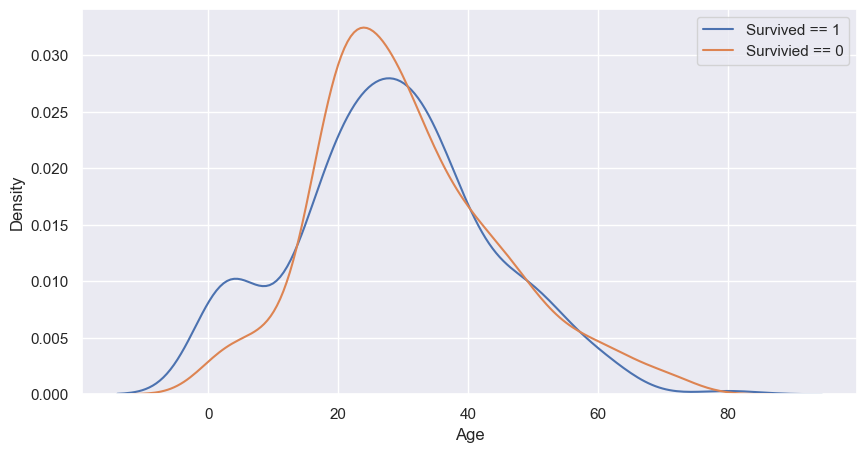

In [200]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survivied == 0'])
plt.show()

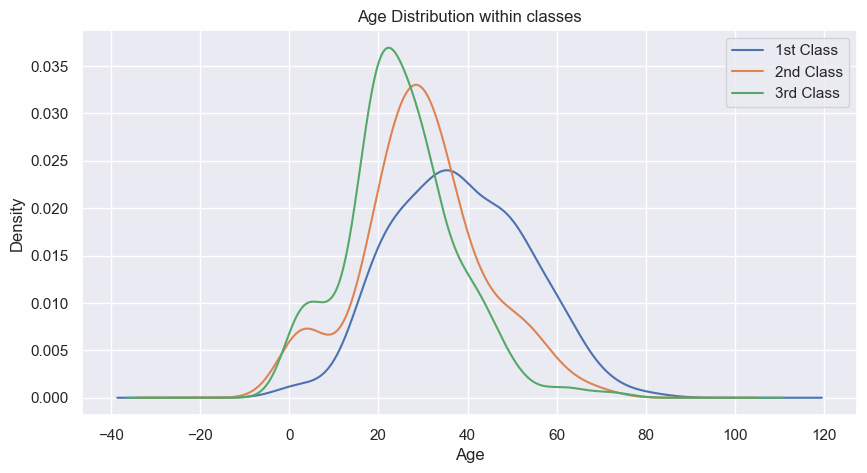

In [209]:
plt.figure(figsize = (10, 5))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind ='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


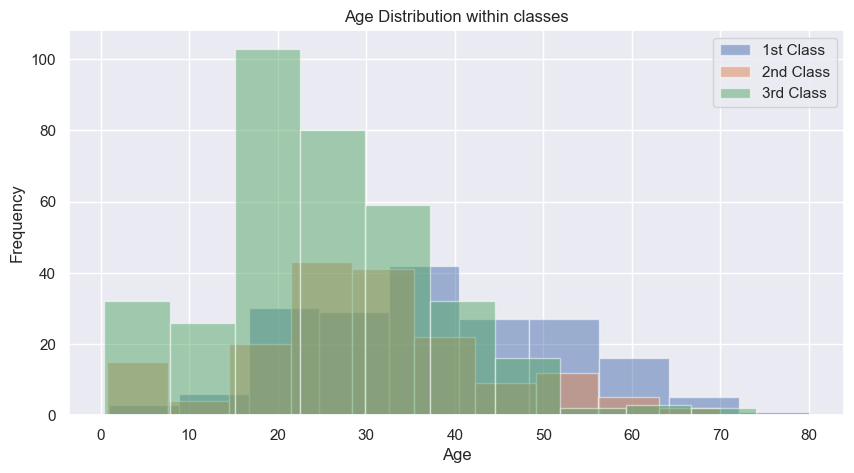

In [213]:
plt.figure(figsize = (10, 5))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'hist', alpha = 0.5)
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'hist', alpha = 0.5)
df_train['Age'][df_train['Pclass'] == 3].plot(kind ='hist', alpha = 0.5)

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

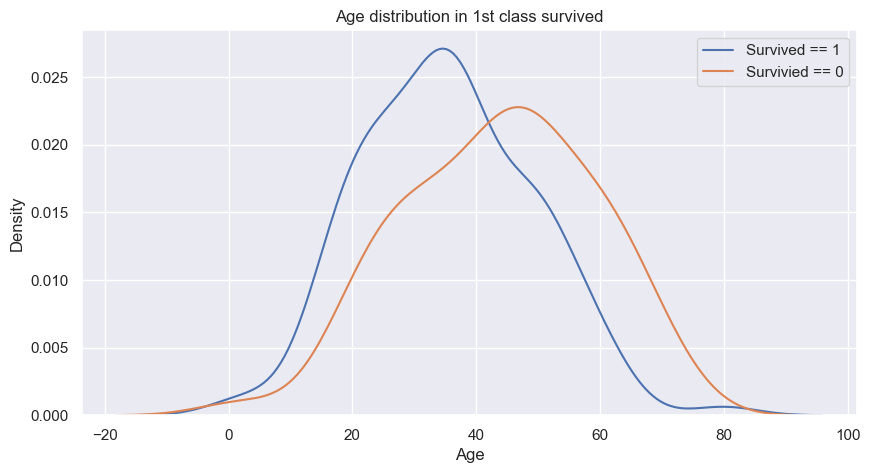

In [219]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.title('Age distribution in 1st class survived')
plt.legend(['Survived == 1', 'Survivied == 0'])
plt.show()

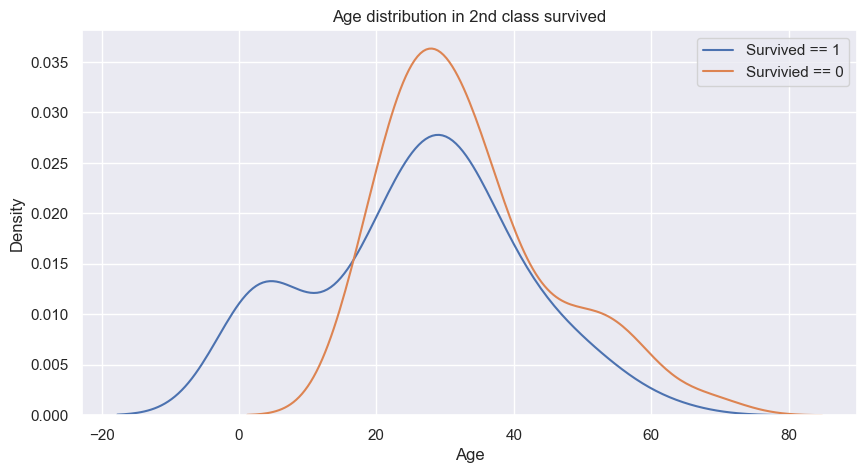

In [220]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.title('Age distribution in 2nd class survived')
plt.legend(['Survived == 1', 'Survivied == 0'])
plt.show()

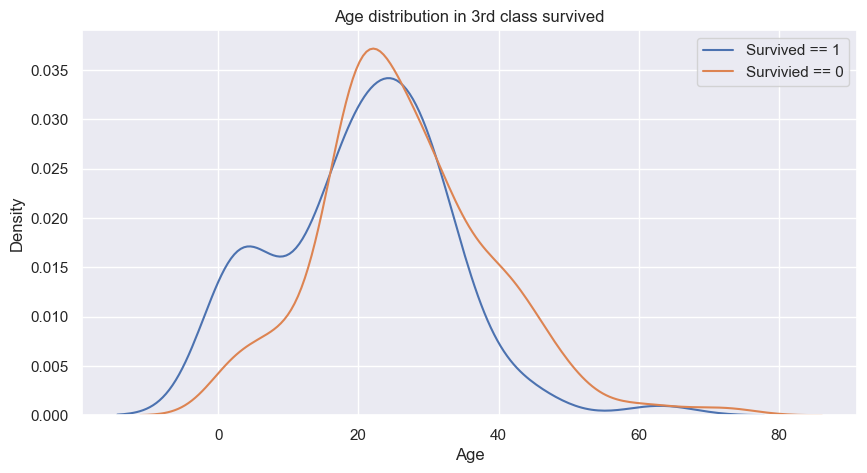

In [221]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.title('Age distribution in 3rd class survived')
plt.legend(['Survived == 1', 'Survivied == 0'])
plt.show()

In [223]:
change_age_range_survival_ratio = []

for i for range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Surviveed'].sum / len(df_train[df_train['Age'] < i])

SyntaxError: invalid syntax (1716405684.py, line 3)

In [ ]:
https://www.youtube.com/watch?v=35j4pCe-fQk&list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF&index=4